# Weak Galerkin Methods for Poisson Equation in 3D

This example is to show the rate of convergence of the linear finite element approximation of the Poisson equation on the unit cube:

$$- \Delta u = f \; \hbox{in } (0,1)^3$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

**Subroutines**:

    - Poisson3WG
    - cubePoisson3WG
    - femPoisson3
    - Poisson3WGfemrate
    
The method is implemented in `Poisson3` subroutine and tested in `cubePoisson`. Together with other elements (P1, P2,Q1,WG), `femPoisson3` provides a concise interface to solve Poisson equation. The P1 element is tested in `Poisson3femrate`. This doc is based on `Poisson3femrate`.    

## The Lowest Order Weak Galerkin Element

The basis and the local matrices can be found in [Progamming of Weak Galerkin Methods](http://www.math.uci.edu/~chenlong/ifemdoc/fem/WGprogramming.pdf)

## Mixed boundary condition

In [4]:
%% Setting
[node,elem] = cubemesh([0,1,0,1,0,1],0.5); 
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 4;
option.elemType = 'WG';
option.printlevel = 1;
option.plotflag = 1;

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     6528,  #nnz:    25576, smoothing: (1,1), iter: 17,   err = 7.80e-09,   time = 0.14 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    50688,  #nnz:   223244, smoothing: (1,1), iter: 17,   err = 9.10e-09,   time = 0.28 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:   399360,  #nnz:  1815764, smoothing: (1,1), iter: 17,   err = 9.78e-09,   time =  2.6 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

   864   2.500e-01   1.62586e-02   5.82293e-01   2.08771e-01   2.74409e-02
  6528   1.250e-01   4.03120e-03   2.94275e-01   9.83063e-02   7.18140e-03
 50688   6.250e-02   1.00634e-03   1.47521e-01   4.83526e-02   1.81988e-03
399360   3.125e-02   2.51527e-04   7.38079e-02   2.40757e-02   4.58839e-04

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

   864   1.70e-01   9.68e-03   9.00e-02   1.00e-02
  6528  

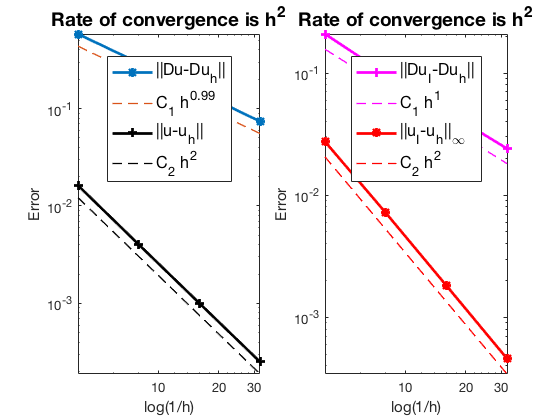

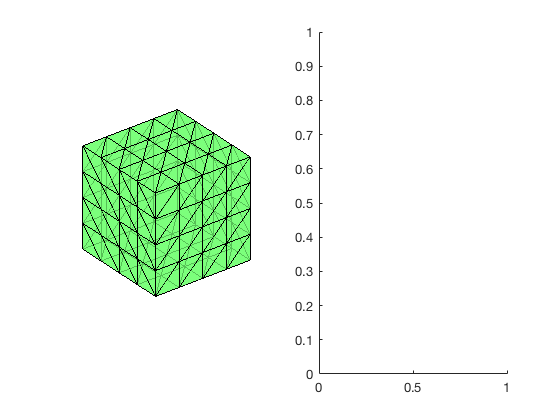

In [5]:
%% Non-empty Dirichlet boundary condition.
pde = sincosdata3;
mesh.bdFlag = setboundary3(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson3(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     6528,  #nnz:    27909, smoothing: (1,1), iter: 20,   err = 7.29e-09,   time =  0.1 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    50688,  #nnz:   232473, smoothing: (1,1), iter: 21,   err = 4.09e-09,   time = 0.33 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:   399360,  #nnz:  1858773, smoothing: (1,1), iter: 22,   err = 4.23e-09,   time =  3.2 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

   864   2.500e-01   2.14311e-02   5.83747e-01   2.58148e-01   1.21000e-01
  6528   1.250e-01   5.28526e-03   2.94315e-01   1.08333e-01   3.88004e-02
 50688   6.250e-02   1.31642e-03   1.47495e-01   4.97809e-02   1.03134e-02
399360   3.125e-02   3.28925e-04   7.38022e-02   2.42593e-02   2.61798e-03

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

   864   6.00e-02   2.09e-03   2.00e-02   0.00e+00
  6528  

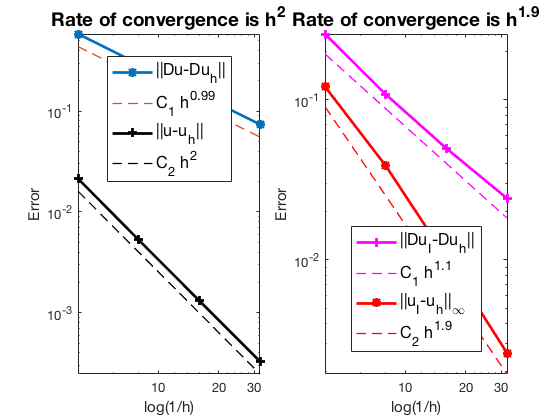

In [6]:
%% Pure Neumann boundary condition.
option.plotflag = 0;
mesh.bdFlag = setboundary3(node,elem,'Neumann');
femPoisson3(mesh,pde,option);

## Robin boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     6528,  #nnz:    27912, smoothing: (1,1), iter: 17,   err = 3.75e-09,   time = 0.085 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    50688,  #nnz:   232476, smoothing: (1,1), iter: 17,   err = 7.36e-09,   time = 0.26 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:   399360,  #nnz:  1858776, smoothing: (1,1), iter: 17,   err = 7.33e-09,   time =  2.1 s
Table: Error
 #Dof        h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

   864   2.500e-01   2.06220e-02   5.78283e-01   2.29477e-01   5.01643e-02
  6528   1.250e-01   5.16104e-03   2.93750e-01   1.01338e-01   1.36257e-02
 50688   6.250e-02   1.29034e-03   1.47454e-01   4.87501e-02   3.60385e-03
399360   3.125e-02   3.22587e-04   7.37995e-02   2.41260e-02   9.11692e-04

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    

   864   4.00e-02   1.77e-03   1.00e-02   0.00e+00
  6528 

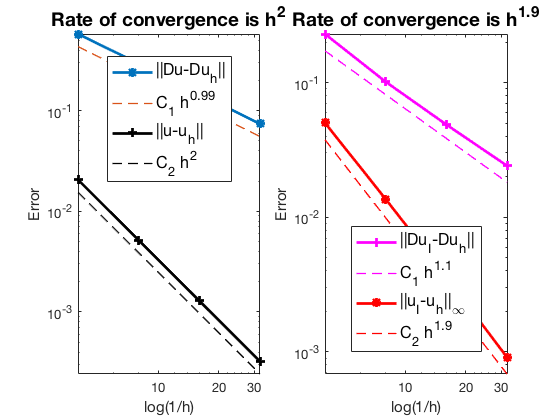

In [7]:
%% Pure Robin boundary condition.
pde = sincosRobindata3;
mesh.bdFlag = setboundary3(node,elem,'Robin');
femPoisson3(mesh,pde,option);

## Conclusion

The optimal rate of convergence of the H1-norm (1st order) and L2-norm
(2nd order) is observed. No superconvergence for $\|\nabla u_I - \nabla u_h\|$.

MGCG converges uniformly in all cases.